In [1]:
import pandas as pd
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

c:\Users\Apm1a\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
tipo = pd.read_csv("pred_window_final.csv")
alfa = pd.read_csv("pred_50_final.csv")
real = pd.read_csv("real_ok.csv")
tray = pd.read_csv("task3.csv")

In [3]:
real = real.iloc[:1000]['Changepoint']

In [4]:
tray = tray.drop(['Unnamed: 0'],axis=1).iloc[:1000]

In [23]:
##Tipo 1:
tipo1 = pd.concat([tray,alfa],axis=1)

In [26]:
train_x, test_x, train_y, test_y = train_test_split(tipo1, real, train_size=0.8,
                                                    test_size=0.2,random_state=42)

In [41]:
param_test1 = { 'max_depth':range(5,10,1),
               'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=300, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27),param_grid = param_test1, scoring='neg_mean_absolute_error',n_jobs=4, cv=5,verbose=2)
gsearch1.fit(train_x,train_y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=300,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, predictor=None, ...),
             n_jobs=4,
             param_grid={'max_depth': range(5, 10),
                         'min_child_weight': range(1, 6, 2)},
             scoring='neg_mean_absolute_error', verbose=2)

In [43]:
gsearch1.best_params_

{'max_depth': 8, 'min_child_weight': 3}

In [44]:
param_test2 = { 'gamma':[i/10.0 for i in range(0,5)],
               'learning_rate':[i/10 for i in range(0,10,2)],
               'n_estimators':[i for i in range(50,100,10)]}
gsearch1 = GridSearchCV(estimator = XGBRegressor(max_depth = 8,min_child_weight = 3, learning_rate =0.1, n_estimators=300, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27),param_grid = param_test2, scoring='neg_mean_absolute_error',n_jobs=4, cv=5,verbose=2)
gsearch1.fit(train_x,train_y)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=8, max_leaves=None,
                                    min_child_weight=3, missing=nan,
                                    monotone_constraints=None, n_estimators=300,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, predictor=None, ...),
             n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.0, 0.2, 0.4, 0.6, 0.8],
                         'n_estimators': [50, 60, 70, 80, 90]},
             scoring='neg_mean_absolute_error', verbose=2)

In [45]:
gsearch1.best_score_

-50.135461653471

In [46]:
gsearch1.best_params_

{'gamma': 0.0, 'learning_rate': 0.2, 'n_estimators': 50}

In [6]:
tipo2 = pd.concat([tipo,alfa],axis=1)

In [7]:
tipo2.columns = [i for i in range(150)] + ['t'+str(i) for i in range(150)]

In [8]:
tipo2

,0,1,2,3,4,5,6,7,8,9,...,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149
0,0,0,0,0,0,0,1,1,1,1,...,0.882925,0.852529,0.820865,0.854865,0.952855,1.199125,1.047506,0.937396,0.878051,0.863841
1,2,1,1,1,1,1,1,1,1,1,...,0.832300,0.922429,0.813903,0.785471,0.810468,0.815196,0.986416,0.935384,0.953862,0.894492
2,0,0,2,4,2,2,2,4,4,4,...,1.231648,1.204990,1.166011,1.208317,1.132064,1.118738,1.067788,1.174055,1.379995,1.394543
3,4,4,4,0,0,0,0,0,0,0,...,0.910492,0.785687,0.795586,0.946763,0.795730,1.115777,1.204621,1.115252,1.057021,1.143422
4,2,2,4,4,2,2,2,2,2,2,...,1.026994,0.979429,0.926983,0.868413,0.970247,1.005959,1.007160,1.094510,1.055305,1.038308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,2,2,2,2,2,2,2,2,2,...,1.186236,1.134329,1.094938,1.088774,1.096355,1.109394,1.025288,1.193600,1.094678,1.035359
996,3,3,3,3,3,3,3,3,3,3,...,0.252858,0.247572,0.251319,0.248458,0.249199,0.251373,0.245567,0.265351,0.237358,0.343641
997,4,2,2,2,2,2,2,2,2,2,...,1.095295,1.117645,1.058584,1.057219,0.929549,0.854649,0.785373,0.761014,0.805829,0.814046
998,1,1,1,1,1,1,1,1,1,1,...,0.587411,0.602478,0.605862,0.613262,0.625125,0.628190,0.635588,0.646881,0.649134,0.649513


In [54]:
train2_x, test2_x, train2_y, test2_y = train_test_split(tipo2, real, train_size=0.8,
                                                    test_size=0.2,random_state=42)

In [55]:
gsearch2 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=300, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27),param_grid = param_test1, scoring='neg_mean_absolute_error',n_jobs=4, cv=5,verbose=2)
gsearch2.fit(train2_x,train2_y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=300,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, predictor=None, ...),
             n_jobs=4,
             param_grid={'max_depth': range(5, 10),
                         'min_child_weight': range(1, 6, 2)},
             scoring='neg_mean_absolute_error', verbose=2)

In [56]:
gsearch2.best_score_

-45.95819696426391

In [57]:
gsearch2.best_params_

{'max_depth': 9, 'min_child_weight': 3}

In [58]:
gsearch2_2 = GridSearchCV(estimator = XGBRegressor(max_depth = 9,min_child_weight = 3,learning_rate =0.1, n_estimators=300, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27),param_grid = param_test2, scoring='neg_mean_absolute_error',n_jobs=4, cv=5,verbose=2)
gsearch2_2.fit(train2_x,train2_y)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=9, max_leaves=None,
                                    min_child_weight=3, missing=nan,
                                    monotone_constraints=None, n_estimators=300,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, predictor=None, ...),
             n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.0, 0.2, 0.4, 0.6, 0.8],
                         'n_estimators': [50, 60, 70, 80, 90]},
             scoring='neg_mean_absolute_error', verbose=2)

In [59]:
gsearch2_2.best_score_

-49.108622205853464

In [60]:
gsearch2_2.best_params_

{'gamma': 0.3, 'learning_rate': 0.2, 'n_estimators': 90}

In [61]:
tipo3 = pd.concat([tipo2,tray],axis=1)

In [64]:
train3_x, test3_x, train3_y, test3_y = train_test_split(tipo3, real, train_size=0.8,
                                                    test_size=0.2,random_state=42)

In [66]:
gsearch3 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=300, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27),param_grid = param_test1, scoring='neg_mean_absolute_error',n_jobs=4, cv=5,verbose=2)
gsearch3.fit(train3_x,train3_y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=300,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, predictor=None, ...),
             n_jobs=4,
             param_grid={'max_depth': range(5, 10),
                         'min_child_weight': range(1, 6, 2)},
             scoring='neg_mean_absolute_error', verbose=2)

In [68]:
gsearch3.best_score_

-45.05441914319992

In [69]:
gsearch3.best_params_

{'max_depth': 5, 'min_child_weight': 3}

In [70]:
gsearch3_2 = GridSearchCV(estimator = XGBRegressor(max_depth = 5,min_child_weight = 3,learning_rate =0.1, n_estimators=300, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27),param_grid = param_test2, scoring='neg_mean_absolute_error',n_jobs=4, cv=5,verbose=2)
gsearch3_2.fit(train3_x,train3_y)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=3, missing=nan,
                                    monotone_constraints=None, n_estimators=300,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, predictor=None, ...),
             n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.0, 0.2, 0.4, 0.6, 0.8],
                         'n_estimators': [50, 60, 70, 80, 90]},
             scoring='neg_mean_absolute_error', verbose=2)

In [71]:
gsearch3_2.best_score_

-46.82657136142254

In [72]:
gsearch3_2.best_params_

{'gamma': 0.0, 'learning_rate': 0.2, 'n_estimators': 60}

Final Model

In [11]:
import shap
import matplotlib.pyplot as plt 

In [10]:
xg=XGBRegressor(gamma= 0.0, learning_rate= 0.2, n_estimators= 60,max_depth = 5,min_child_weight = 3, subsample=0.8, colsample_bytree=0.8,
    objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27)
xg.fit(tipo2,real)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=60, n_jobs=None, nthread=4, num_parallel_tree=None,
             predictor=None, ...)

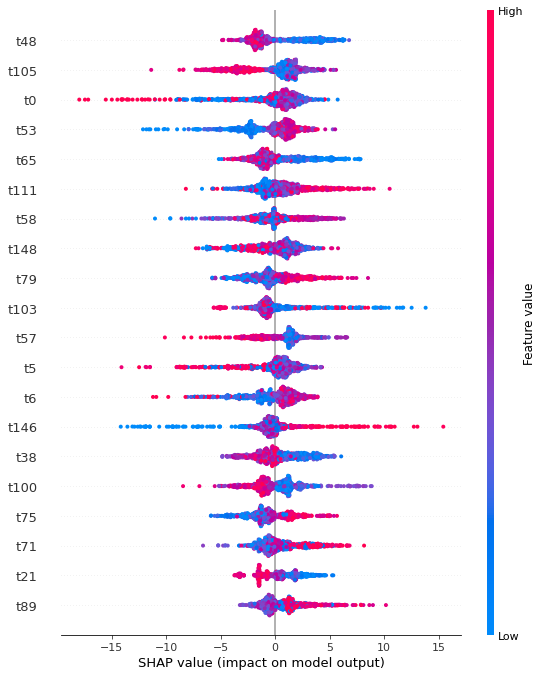

In [63]:
explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(tipo2)
shap.summary_plot(shap_values[:,150:300], tipo2.loc[:,tipo2.columns[150:300]])

In [60]:
len()

1000